In [7]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [8]:
df = pd.read_csv("steam_games.csv")

In [9]:
df['Game Name'] = df['Game Name'].astype(str).str.strip()

In [10]:
df.head()

,AppID,Game Name,Game Tags,Release Date,Developer,Publisher,Price (in Rupees)
0,578080,PUBG: BATTLEGROUNDS,Survival Shooter Battle Royale Multiplayer FPS...,"21 Dec, 2017",PUBG Corporation,"KRAFTON, Inc.",Free To Play
1,1623730,Palworld,Open World Survival Creature Collector Multipl...,"18 Jan, 2024",Pocketpair,Pocketpair,"₹ 2,160"
2,1172470,Apex Legends™,Free to Play Battle Royale Multiplayer FPS Sho...,"4 Nov, 2020",Respawn,Electronic Arts,Free To Play
3,1063730,New World: Aeternum,Open World Massively Multiplayer MMORPG RPG Ad...,"28 Sep, 2021",Amazon Games,Amazon Games,"₹ 6,676"
4,550,Left 4 Dead 2,Zombies Co-op FPS Multiplayer Shooter Online C...,"16 Nov, 2009",Valve,Valve,₹ 720


In [11]:
game_dropdown = widgets.Combobox(
    placeholder='Type or select a game',
    options=sorted(df['Game Name'].unique()),
    description='Select Game:',
    ensure_option=True,
    layout=widgets.Layout(width='70%')
)

# Create button
search_button = widgets.Button(
    description="Search Game",
    button_style='success'
)

# Create output widget
output = widgets.Output()

# Define callback for the button
def on_button_click(b):
    with output:
        clear_output()
        selected_game = game_dropdown.value.strip()
        if selected_game in df['Game Name'].values:
            game_info = df[df['Game Name'] == selected_game].iloc[0]
            print("Game Selected:")
            print(f"Name        : {game_info['Game Name']}")
            print(f"AppID       : {game_info['AppID']}")
            print(f"Release Date: {game_info['Release Date']}")
            print(f"Developer   : {game_info['Developer']}")
            print(f"Publisher   : {game_info['Publisher']}")
            print(f"Tags        : {game_info['Game Tags']}")
            print(f"Price (INR) : {game_info['Price (in Rupees)']}")
        else:
            print("Game not found. Please select a valid game from the dropdown.")

# Bind button click to function
search_button.on_click(on_button_click)

# Display UI
ui = widgets.VBox([game_dropdown, search_button, output])
display(ui)

In [12]:
import requests

def fetch_steam_reviews(appid, num_reviews=100):
    url = f"https://store.steampowered.com/appreviews/{appid}?json=1&num_per_page={num_reviews}&language=english"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if 'reviews' in data:
            reviews = [review['review'] for review in data['reviews']]
            return reviews
        else:
            print("No reviews found.")
            return []
    else:
        print(f"Failed to fetch reviews. Status code: {response.status_code}")
        return []

# Example: Fetch reviews for selected game
selected_game = game_dropdown.value.strip()
game_row = df[df['Game Name'] == selected_game]

if not game_row.empty:
    appid = game_row.iloc[0]['AppID']
    reviews = fetch_steam_reviews(appid)

    print(f"Fetched {len(reviews)} reviews for {selected_game} (AppID: {appid})")
    for i, review in enumerate(reviews[:5], 1):  # show first 5 reviews
        print(f"\nReview {i}: {review}")
else:
    print("Game not found.")


Fetched 100 reviews for Age of Empires II: Definitive Edition (AppID: 813780)

Review 1: Update on Apr 10, 2025 downgraded all the medals completed earlier. 
Give me back my gold medals, you thief!

Review 2: Age of Empires II: Definitive Edition is a masterpiece that brings back the classic RTS experience with stunning visual upgrades and refined gameplay. The remastered graphics, improved AI, and quality-of-life changes make it the best way to experience this legendary game. Whether you're a veteran returning to relive the nostalgia or a new player stepping into the world of medieval strategy, this edition offers endless hours of engaging battles, strategic planning, and empire-building. The multiplayer is still as intense as ever, and the constant updates keep the game feeling fresh. It's a must-play for any fan of strategy games.

Review 3: Today's update wiped years of progress from my campaigns. Over the last 2 months I've worked on getting gold in every campaign and they have ro

In [13]:
import re
from nltk.corpus import stopwords

# Preprocessing function using regex tokenizer
def preprocess_reviews(reviews):
    stop_words = set(stopwords.words('english'))
    clean_reviews = []

    for review in reviews:
        review = review.lower()
        review = re.sub(r"[^a-zA-Z\s]", "", review)  # Remove special characters
        tokens = re.findall(r'\b[a-zA-Z]{2,}\b', review)  # Keep words with 2+ letters
        filtered_tokens = [word for word in tokens if word not in stop_words]
        clean_reviews.append(" ".join(filtered_tokens))

    return clean_reviews

# Run the preprocessing
cleaned_reviews = preprocess_reviews(reviews)

# Show a few cleaned reviews
for i, rev in enumerate(cleaned_reviews[:5], 1):
    print(f"\nCleaned Review {i}: {rev}")



Cleaned Review 1: update apr downgraded medals completed earlier give back gold medals thief

Cleaned Review 2: age empires ii definitive edition masterpiece brings back classic rts experience stunning visual upgrades refined gameplay remastered graphics improved ai qualityoflife changes make best way experience legendary game whether youre veteran returning relive nostalgia new player stepping world medieval strategy edition offers endless hours engaging battles strategic planning empirebuilding multiplayer still intense ever constant updates keep game feeling fresh mustplay fan strategy games

Cleaned Review 3: todays update wiped years progress campaigns last months ive worked getting gold every campaign rolled back bronze silver also completed ever campaign years ago dlc campaigns show progress ive played game years ever since child going make take break cannot recommend playing play campaigns progress may wiped waiting play well life cycle next dlc three kingdoms

Cleaned Review 

In [14]:
# Define a list of common bug/error-related keywords
error_keywords = [
    "bug", "bugs", "crash", "crashing", "crashed", "glitch", "glitches",
    "error", "issue", "lag", "lagging", "freezing", "freeze", "broken",
    "problem", "problems", "unplayable", "disconnect", "stuck", "slow"
]

# Detect and store reviews containing bug/error keywords
bug_related_reviews = []
for review in cleaned_reviews:
    if any(keyword in review for keyword in error_keywords):
        bug_related_reviews.append(review)

# Show results
print(f"\nFound {len(bug_related_reviews)} reviews mentioning bugs/errors.")
for i, rev in enumerate(bug_related_reviews[:5], 1):
    print(f"\nBug Review {i}: {rev}")



Found 12 reviews mentioning bugs/errors.

Bug Review 1: game good state working problems game exciting see something childhood get much support wish games fandoms get similar fates

Bug Review 2: ive spent countless hours age empires ii definitive edition ive completed nearly every single campaign including dlcs hardest difficultyand earned gold medals across board thats much time effort dedication ive put game however recent update hardearned gold medals downgraded silver every single one incredibly frustrating feel like progress erased also completely undermines challenge satisfaction pushing toughest settings didnt breeze campaignsi earned golds fair square often replaying missions multiple times get perfect really hope developers address whether bug intentional change demoralizing longtime players whove invested much game hard stay motivated keep playing chase new medals past accomplishments taken away like

Bug Review 3: microsoft milking game worth bloating heck civ count adding

In [15]:
bug_percentage = (len(bug_related_reviews) / len(cleaned_reviews)) * 100
print(f"\nBug/Error Mentions: {bug_percentage:.2f}% of total reviews.")



Bug/Error Mentions: 12.00% of total reviews.


In [16]:
from textblob import TextBlob

# Analyze sentiment polarity (-1 to +1)
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply on bug-related reviews
sentiment_scores = [get_sentiment_polarity(review) for review in bug_related_reviews]

# Categorize sentiment
sentiments = ["Positive" if score > 0 else "Negative" if score < 0 else "Neutral" for score in sentiment_scores]

# Count sentiment distribution
from collections import Counter
sentiment_count = Counter(sentiments)

# Print results
print("\nSentiment Distribution on Bug-Related Reviews:")
for sentiment, count in sentiment_count.items():
    print(f"{sentiment}: {count} reviews")

# Optional: Show sample reviews with negative sentiment
print("\nSample Negative Reviews:")
for i, review in enumerate([r for r, s in zip(bug_related_reviews, sentiments) if s == "Negative"][:3], 1):
    print(f"\nNegative Review {i}: {review}")



Sentiment Distribution on Bug-Related Reviews:
Positive: 7 reviews
Negative: 5 reviews

Sample Negative Reviews:

Negative Review 1: good game yes really fun definitive edition classic game spent much youth playing wow ai game leaves lot desired whether enemy campaigns really dumb movement wack get stuck lot sometimes theyll think impassible villager dont automatically move way theres lot chokepoints map design troop design fails also dislike attacking city works army stances put defensive stance wont actively attack buildings unless offensive buildings attacking army put aggressive usually theyll attack sometimes veer far following enemy way across map never giving theres inbetween

Negative Review 2: almost years new issues constantly crashing game startup fix sh

Negative Review 3: new update ruined longest lasting memorable maps games unplayable errors make ai nothing stay away realize terrible update forced upon fans something fix


In [17]:
from collections import Counter

# Tokenize all bug-related reviews into words
all_words = " ".join(bug_related_reviews).split()

# Count most common words
word_freq = Counter(all_words)

# Show top 15 keywords
print("Top 15 Frequent Words in Bug Reports:")
for word, freq in word_freq.most_common(15):
    print(f"{word}: {freq}")


Top 15 Frequent Words in Bug Reports:
game: 24
new: 7
campaigns: 7
content: 7
much: 6
games: 6
age: 6
definitive: 6
many: 6
dlc: 6
multiplayer: 6
something: 5
get: 5
edition: 5
way: 5


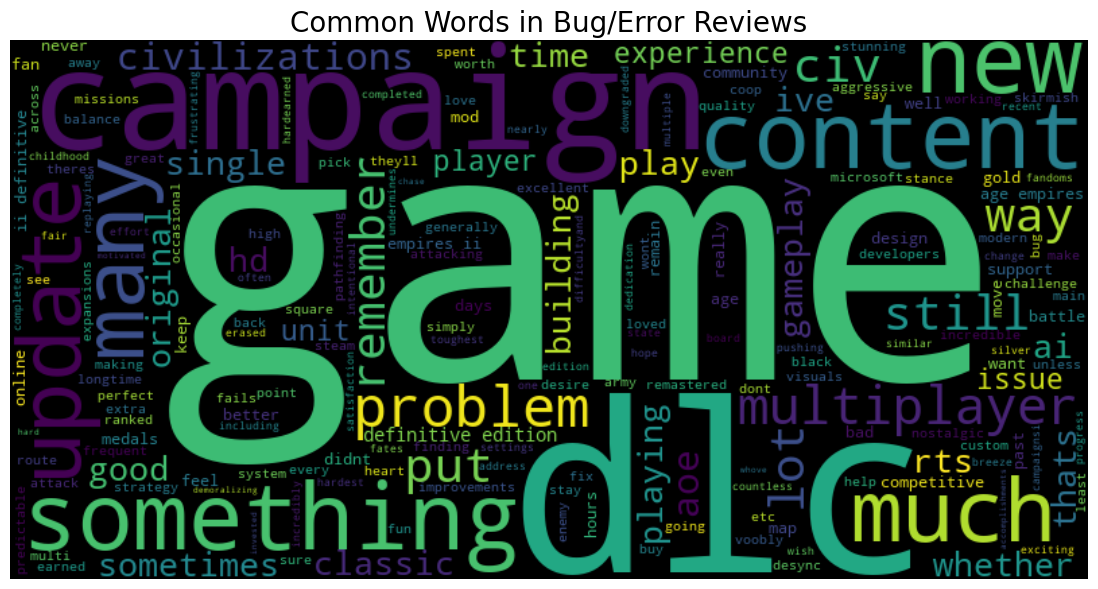

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(bug_related_reviews))

# Display Word Cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Bug/Error Reviews", fontsize=20)
plt.show()
